# Project 1

In [20]:
from tensorflow import keras
import tensorflow as tf

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
def reshape(data):
    arr = np.where(data > 0.5, 1, 0)
    return arr

In [25]:
function = lambda x: reshape(x)
X_train = function(x_train)
X_test = function(x_test)

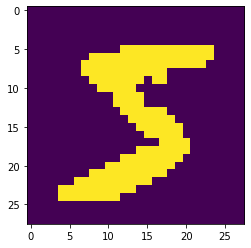

In [26]:
plt.imshow(X_train[0])

In [27]:
def categorical_labels(label):
    label = keras.utils.to_categorical(label, num_classes=10)
    return label
train_labels = []
for label in y_train:
    label = categorical_labels(label)
    train_labels.append(label)
test_labels = []
for label in y_test:
    label = categorical_labels(label)
    test_labels.append(label)

In [28]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [29]:
x_train = np.expand_dims(X_train, -1)

In [30]:
x_test = np.expand_dims(X_test, -1)


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


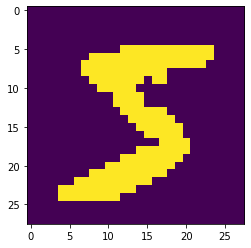

In [31]:
plt.imshow(x_train[0])
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


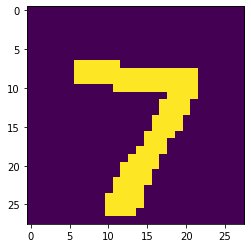

In [32]:
plt.imshow(x_test[0])
print(y_test[0])

In [33]:
input_shape = keras.layers.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(input_shape)
x = keras.layers.MaxPool2D((3, 3), 2)(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPool2D((3, 3), 2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
x = keras.layers.Dense(32, activation="relu")(x)
output = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(input_shape, output)

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0     

In [35]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"], optimizer="adam")
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1821 - accuracy: 0.9436 - val_loss: 0.0862 - val_accuracy: 0.9733
Epoch 2/50
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0641 - accuracy: 0.9803 - val_loss: 0.0526 - val_accuracy: 0.9835
Epoch 3/50
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0466 - accuracy: 0.9849 - val_loss: 0.0471 - val_accuracy: 0.9846
Epoch 4/50
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0399 - val_accuracy: 0.9875
Epoch 5/50
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0386 - val_accuracy: 0.9882
Epoch 6/50
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 7/50
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0436 -

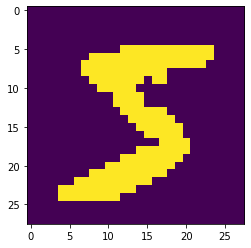

(1, 28, 28, 1)

In [36]:
value = x_train[0]
plt.imshow(value)
plt.show()
value = np.expand_dims(value, 0)
value.shape

In [37]:
pred = model(value)

In [38]:
pred = tf.constant(pred)
pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.6629169e-27, 7.9824393e-22, 8.7889143e-25, 4.4773798e-09,
        4.2608251e-30, 1.0000000e+00, 1.6026065e-20, 8.1667367e-33,
        1.2200473e-17, 4.3690843e-20]], dtype=float32)>

In [39]:
tf.math.argmax(pred, 1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([5], dtype=int64)>

In [40]:
tf.math.top_k(pred, 1)

TopKV2(values=<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[5]])>)

In [45]:
model.save("deep_learning_project_1_working.h5")

In [46]:
model = keras.models.load_model("D:/projects/touch_pad/deep_learning_project_1_working.h5")

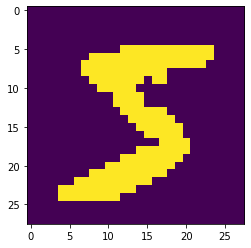

In [47]:
value = x_train[0]
plt.imshow(value)

In [48]:
value = tf.expand_dims(value, 0)
value = tf.expand_dims(value, -1)
print(value.shape)
pred = model.predict(value)
print(pred)
tf.math.argmax(pred, 1)

(1, 28, 28, 1, 1)
[[1.6629169e-27 7.9824393e-22 8.7889143e-25 4.4773798e-09 4.2608251e-30
  1.0000000e+00 1.6026065e-20 8.1667367e-33 1.2200473e-17 4.3690843e-20]]


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([5], dtype=int64)>

In [1]:
import tensorflow.keras as keras

In [4]:
import numpy as np
x = np.random.rand(100, 100)

In [5]:
input = keras.layers.Input(shape=(100, 100))
y = keras.layers.Dense(100)(input)
y = keras.layers.Dense(100)(y)
model = keras.Model(input, y)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100)]        0         
                                                                 
 dense_2 (Dense)             (None, 100, 100)          10100     
                                                                 
 dense_3 (Dense)             (None, 100, 100)          10100     
                                                                 
Total params: 20,200
Trainable params: 20,200
Non-trainable params: 0
_________________________________________________________________


# Project 2 

In [213]:
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim

In [214]:
from torchvision import datasets
import torchvision
import os
import matplotlib.pyplot as plt

In [215]:
transformer = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
data = "D:\datasets_CSV"
dataset = datasets.ImageFolder(os.path.join(data, "t_shirt"), transform=transformer)

In [216]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

In [217]:
inputs, classes = next(iter(dataloader))
out = torchvision.utils.make_grid(inputs)
print(classes)

tensor([1, 1, 1, 1])


In [218]:
for i in inputs:
    print(i.size())

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [219]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [220]:
import numpy as np

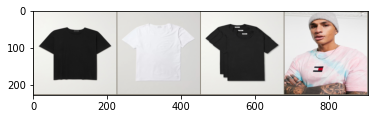

In [221]:
out = out.numpy().transpose((1, 2, 0))
inp = out*std + mean
plt.imshow(np.clip(inp, 0, 1))

In [222]:
class ConvolutionalNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, (2, 2), (1, 1))
        self.max1 = nn.MaxPool2d((2, 2), (2, 2))
        self.conv2 = nn.Conv2d(64, 128, (2, 2), (1, 1))
        self.max2 = nn.MaxPool2d((2, 2), (2, 2))
        self.fc1 = nn.Linear(387200, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.out = nn.Sigmoid()
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.max1(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.max2(x)
        x = x.view(x.shape[0], -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.out(x)
        return x

In [223]:
def train_func(model, dataset, epochs, loss, optim):
    dataset_size = len(dataset)
    regular_loss = 0
    correct = 0
    for epoch in range(epochs):
        for i, (data, label) in enumerate(dataset):
            label = label.type(torch.float32)
            label = label.unsqueeze_(-1)
            pred = model(data)
            value_loss = loss(pred, label)
            optim.zero_grad()
            value_loss.backward()
            optim.step()
            regular_loss += value_loss
            _, pred = torch.max(pred, 1)
            if i%100 == 0:
                print("Loss=", regular_loss, " epoch=", epoch, " i=", i)
        print("Loss=", regular_loss / dataset_size, " epoch=", epoch, " i=", i, " epoch end")
        regular_loss=0

In [224]:
model = ConvolutionalNeuralNetwork()
optim = optim.Adam(model.parameters())
print(model)

ConvolutionalNeuralNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1))
  (max1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (max2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=387200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (out): Sigmoid()
)


In [225]:
loss = nn.BCELoss()
# images, _ = next(iter(dataloader))
# for i in images:
#     image = i
#     break
# image.shape
# pred = model(image)
# print("pred=", pred)
train_func(model, dataloader, 2, loss, optim)

Loss= tensor(0.5905, grad_fn=<AddBackward0>)  epoch= 0  i= 0
Loss= tensor(1750.5905, grad_fn=<AddBackward0>)  epoch= 0  i= 100
Loss= tensor(3400.5903, grad_fn=<AddBackward0>)  epoch= 0  i= 200
Loss= tensor(5375.5903, grad_fn=<AddBackward0>)  epoch= 0  i= 300
Loss= tensor(7125.5903, grad_fn=<AddBackward0>)  epoch= 0  i= 400
Loss= tensor(17.8369, grad_fn=<DivBackward0>)  epoch= 0  i= 498  epoch end
Loss= tensor(0., grad_fn=<AddBackward0>)  epoch= 1  i= 0
Loss= tensor(1825., grad_fn=<AddBackward0>)  epoch= 1  i= 100
Loss= tensor(3275., grad_fn=<AddBackward0>)  epoch= 1  i= 200
Loss= tensor(5175., grad_fn=<AddBackward0>)  epoch= 1  i= 300
Loss= tensor(7100., grad_fn=<AddBackward0>)  epoch= 1  i= 400
Loss= tensor(17.8357, grad_fn=<DivBackward0>)  epoch= 1  i= 498  epoch end


In [226]:
classes = dataset.classes
classes

['full', 'tshirt']

In [227]:
import numpy as np

In [228]:
image = torchvision.io.read_image("D:/datasets_CSV/t_shirt/full/2.jpg")

In [229]:
image.shape

torch.Size([3, 656, 513])

In [230]:
image = transforms.ToPILImage()(image)

In [231]:
image = transformer(image)
image = image.unsqueeze_(0)

In [232]:

pred = model(image)

In [233]:
pred.shape

torch.Size([1, 1])

In [234]:
pred[0][0]

tensor(1., grad_fn=<SelectBackward0>)

In [235]:
image = torchvision.io.read_image("D:/datasets_CSV/t_shirt/tshirt/11.jpg")
image.shape

torch.Size([3, 656, 513])

In [236]:
image = transforms.ToPILImage()(image)
image = transformer(image)

In [237]:
image = image.unsqueeze(0)
pred = model(image)
pred[0][0]

tensor(1., grad_fn=<SelectBackward0>)

# Project 3

In [5]:
import translate
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("D:/datasets_CSV/uber/Uber.csv")

In [7]:
df

Unnamed: 0                   id      conversation_id       created_at  \
0              0  1546244282515951616  1546244282515951616  1657488339000.0   
1              1  1546244279533678592  1546244279533678592  1657488338000.0   
2              2  1546244277604421633  1546241690159177730  1657488338000.0   
3              3  1546244275243024386  1546186771737837569  1657488337000.0   
4              4  1546244271820382208  1546244271820382208  1657488336000.0   
...          ...                  ...                  ...              ...   
10007      10006  1546193032613175298  1546193032613175298  1657476120000.0   
10008      10007  1546193028674732034  1546193028674732034  1657476119000.0   
10009      10008  1546193018197270529  1546193018197270529  1657476117000.0   
10010      10009  1546193013721948161  1527655335409885184  1657476116000.0   
10011      10010  1546193013185052677  1546193013185052677  1657476115000.0   

                      date  timezone place  \
0      2022-07-10 21:25:39         0   NaN   
1      2022-07-10 21:25:38         0   NaN   
2      2022-07-10 21:25:38         0   NaN   
3      2022-07-10 21:25:37         0   NaN   
4      2022-07-10 21:25:36         0   NaN   
...                    ...       ...   ...   
10007  2022-07-10 18:02:00         0   NaN   
10008  2022-07-10 18:01:59         0   NaN   
10009  2022-07-10 18:01:57         0   NaN   
10010  2022-07-10 18:01:56         0   NaN   
10011  2022-07-10 18:01:55         0   NaN   

                                                   tweet language  \
0      motorista do uber é flamenguista meu deus que ...       pt   
1      “Le service de hélage électronique Uber a entr...       fr   
2      @hendopolis @redkev71 @Uber That, my friend, i...       en   
3      @RocharGrimaud @Clemence_Guette Votre fluidité...       fr   
4      Spent 20 minutes in an Uber listening to what ...       en   
...                                                  ...      ...   
10007  Si le Guardian et Le Monde, deux chiens de gar...       fr   
10008  🚨 CALL FOR ACTION🚨 6000 assaults at Uber alone...       en   
10009  Wow, so Uber was actually even worse than I th...       en   
10010  @SectorMovilidad Porque no dependo de los hora...       es   
10011   @stanzaselvaggia uber files ?! Dai su parliamone       it   

                                 hashtags  ... geo source user_rt_id user_rt  \
0                                      []  ... NaN    NaN        NaN     NaN   
1                                      []  ... NaN    NaN        NaN     NaN   
2                                      []  ... NaN    NaN        NaN     NaN   
3                                      []  ... NaN    NaN        NaN     NaN   
4                                      []  ... NaN    NaN        NaN     NaN   
...                                   ...  ...  ..    ...        ...     ...   
10007                                  []  ... NaN    NaN        NaN     NaN   
10008                                  []  ... NaN    NaN        NaN     NaN   
10009  ['boycottuber', 'boycottubereats']  ... NaN    NaN        NaN     NaN   
10010                                  []  ... NaN    NaN        NaN     NaN   
10011                                  []  ... NaN    NaN        NaN     NaN   

      retweet_id                                           reply_to  \
0            NaN                                                 []   
1            NaN                                                 []   
2            NaN  [{'screen_name': 'hendopolis', 'name': 'Neil H...   
3            NaN  [{'screen_name': 'RocharGrimaud', 'name': 'Fra...   
4            NaN                                                 []   
...          ...                                                ...   
10007        NaN                                                 []   
10008        NaN                                                 []   
10009        NaN                                                 []   
1001

In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [16]:
df1 = df.drop(["Unnamed: 0", "id", "conversation_id", "created_at", "date", "timezone", "place", "hashtags", "cashtags", "user_id", "photos", "video", "thumbnail", "retweet", "nlikes", "nreplies", "nretweets", "quote_url", "search", "near", "geo", "source", "user_rt_id", "user_rt", "retweet_id", "reply_to", "retweet_date", "translate", "trans_src", "trans_dest"], axis="columns")

In [18]:
df2 = df1.drop(["user_id_str", "username", "name", "day", "hour", "link", "urls"], axis="columns")

In [19]:
df2

tweet language
0      motorista do uber é flamenguista meu deus que ...       pt
1      “Le service de hélage électronique Uber a entr...       fr
2      @hendopolis @redkev71 @Uber That, my friend, i...       en
3      @RocharGrimaud @Clemence_Guette Votre fluidité...       fr
4      Spent 20 minutes in an Uber listening to what ...       en
...                                                  ...      ...
10007  Si le Guardian et Le Monde, deux chiens de gar...       fr
10008  🚨 CALL FOR ACTION🚨 6000 assaults at Uber alone...       en
10009  Wow, so Uber was actually even worse than I th...       en
10010  @SectorMovilidad Porque no dependo de los hora...       es
10011   @stanzaselvaggia uber files ?! Dai su parliamone       it

[10012 rows x 2 columns]

In [22]:
df2.isna().sum()

tweet       0
language    1
dtype: int64

In [23]:
df3 = df2.dropna()

In [24]:
df3.isna().sum()

tweet       0
language    0
dtype: int64

In [26]:
df3.shape

(10011, 2)

In [27]:
df3.language.unique()

array(['pt', 'fr', 'en', 'es', 'und', 'it', 'nl', 'ja', 'qme', 'pl', 'de',
       'cs', 'ca', 'el', 'is', 'qht', 'fi', 'tr', 'sl', 'sv', 'qam', 'in',
       'zh', 'ta', 'ro', 'tl', 'ru', 'no', 'cy', 'ar', 'iw', 'da', 'bg',
       'hi', 'ur', 'sr', 'uk', 'eu', 'lv', '7', 'ht'], dtype=object)

In [145]:
x = df3["tweet"]
y = pd.get_dummies(df3["language"]).values

In [146]:
import re
import tensorflow as tf
import tensorflow.keras as keras
import string

In [147]:
def text_vectorizations(data):
    lower = tf.strings.lower(data)
    at = tf.strings.regex_replace(lower, "@", "")
    return tf.strings.regex_replace(at,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')


In [148]:
values = keras.layers.TextVectorization(standardize=text_vectorizations, output_sequence_length=250, 
                                        max_tokens=1000, output_mode="int")

In [149]:
values.adapt(x)
X = values(x)
X = tf.cast(X, tf.float32)
print(X.shape)

(10011, 250)


In [152]:
input = keras.layers.Input(shape=(250))
x = keras.layers.Embedding(1000, 250)(input)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128)(x)
output = keras.layers.Dense(41, activation="softmax")(x)
model = keras.Model(input, output)

In [153]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 250)]             0         
                                                                 
 embedding_20 (Embedding)    (None, 250, 250)          250000    
                                                                 
 dropout_36 (Dropout)        (None, 250, 250)          0         
                                                                 
 flatten_3 (Flatten)         (None, 62500)             0         
                                                                 
 dense_39 (Dense)            (None, 128)               8000128   
                                                                 
 dense_40 (Dense)            (None, 41)                5289      
                                                                 
Total params: 8,255,417
Trainable params: 8,255,417
Non-tra

In [155]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"], optimizer="adam")
model.fit(X, y, validation_split=0.2, epochs=5)

Epoch 1/5
251/251 [==============================] - 31s 119ms/step - loss: 0.9255 - accuracy: 0.8022 - val_loss: 0.4348 - val_accuracy: 0.8992
Epoch 2/5
251/251 [==============================] - 30s 118ms/step - loss: 0.2842 - accuracy: 0.9324 - val_loss: 0.3513 - val_accuracy: 0.9121
Epoch 3/5
251/251 [==============================] - 29s 117ms/step - loss: 0.2014 - accuracy: 0.9524 - val_loss: 0.3220 - val_accuracy: 0.9246
Epoch 4/5
251/251 [==============================] - 30s 118ms/step - loss: 0.1526 - accuracy: 0.9620 - val_loss: 0.3462 - val_accuracy: 0.9246
Epoch 5/5
251/251 [==============================] - 29s 117ms/step - loss: 0.1223 - accuracy: 0.9682 - val_loss: 0.3788 - val_accuracy: 0.9181


In [159]:
input = keras.layers.Input(shape=(250))
x = keras.layers.Embedding(1000, 250)(input)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.LSTM(250)(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64)(x)
output = keras.layers.Dense(41, activation="softmax")(x)
model1 = keras.Model(input, output)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 250)]             0         
                                                                 
 embedding_20 (Embedding)    (None, 250, 250)          250000    
                                                                 
 dropout_36 (Dropout)        (None, 250, 250)          0         
                                                                 
 flatten_3 (Flatten)         (None, 62500)             0         
                                                                 
 dense_39 (Dense)            (None, 128)               8000128   
                                                                 
 dense_40 (Dense)            (None, 41)                5289      
                                                                 
Total params: 8,255,417
Trainable params: 8,255,417
Non-tra

In [160]:
model1.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"], optimizer="adam")
model1.fit(X, y, validation_split=0.2, epochs=5)

Epoch 1/5
251/251 [==============================] - 336s 1s/step - loss: 1.8764 - accuracy: 0.3404 - val_loss: 2.0296 - val_accuracy: 0.3225
Epoch 2/5
251/251 [==============================] - 329s 1s/step - loss: 1.8035 - accuracy: 0.3433 - val_loss: 2.0519 - val_accuracy: 0.2017
Epoch 3/5
251/251 [==============================] - 329s 1s/step - loss: 1.8031 - accuracy: 0.3392 - val_loss: 2.0265 - val_accuracy: 0.3225
Epoch 4/5
251/251 [==============================] - 332s 1s/step - loss: 1.8005 - accuracy: 0.3457 - val_loss: 2.0217 - val_accuracy: 0.3225
Epoch 5/5
251/251 [==============================] - 334s 1s/step - loss: 1.7983 - accuracy: 0.3489 - val_loss: 2.0184 - val_accuracy: 0.3225


In [169]:
a = X[0]
a.shape
a = tf.expand_dims(a, 0)
a.shape

TensorShape([1, 250])

In [170]:
model.predict(a)

array([[7.0584198e-12, 4.0495426e-10, 6.6859468e-10, 6.2525221e-11,
        8.1098062e-09, 2.3867580e-11, 2.4931671e-10, 1.1420374e-12,
        9.4762783e-13, 1.2132910e-11, 1.5943529e-09, 7.5469561e-12,
        9.9676578e-10, 5.2108856e-10, 5.7777286e-12, 3.8265962e-12,
        7.2644961e-09, 1.7515818e-09, 1.9633642e-08, 3.2992920e-12,
        4.0268782e-12, 9.6683155e-11, 2.1699208e-11, 4.9922033e-12,
        1.2910705e-08, 9.9999988e-01, 1.3258276e-09, 3.0873748e-11,
        6.3354981e-11, 2.1817079e-10, 6.0928187e-09, 4.1116507e-10,
        8.1426414e-11, 3.5004335e-09, 2.8968669e-10, 1.9428428e-11,
        3.4734249e-09, 8.8020563e-12, 1.7027307e-09, 2.5923896e-10,
        6.6920506e-12]], dtype=float32)

# Project 4

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/datasets_CSV/SriLankaTweets/SriLankaTweets.csv")
df

Unnamed: 0                   id      conversation_id    created_at  \
0               0  1546235784730230785  1546089912042127362  1.657486e+12   
1               1  1546235779906781186  1546235779906781186  1.657486e+12   
2               2  1546235777633468416  1546235777633468416  1.657486e+12   
3               3  1546235770582847496  1546185673593524225  1.657486e+12   
4               4  1546235754342498308  1546235754342498308  1.657486e+12   
...           ...                  ...                  ...           ...   
9999         9999  1546176323789504512  1546176323789504512  1.657472e+12   
10000       10000  1546176319079292929  1546125419350528001  1.657472e+12   
10001       10001  1546176300200624128  1546176300200624128  1.657472e+12   
10002       10002  1546176298246033408  1546176298246033408  1.657472e+12   
10003       10003  1546176296568619008  1546176296568619008  1.657472e+12   

                      date  timezone place  \
0      2022-07-10 20:51:53         0   NaN   
1      2022-07-10 20:51:52         0   NaN   
2      2022-07-10 20:51:51         0   NaN   
3      2022-07-10 20:51:50         0   NaN   
4      2022-07-10 20:51:46         0   NaN   
...                    ...       ...   ...   
9999   2022-07-10 16:55:36         0   NaN   
10000  2022-07-10 16:55:35         0   NaN   
10001  2022-07-10 16:55:31         0   NaN   
10002  2022-07-10 16:55:30         0   NaN   
10003  2022-07-10 16:55:30         0   NaN   

                                                   tweet language  \
0      @MrJonasDanner Das geht doch seit Beginn der B...       de   
1      Artículo lúcido y bien informado sobre la cris...       es   
2      En argentina y después de lo de Sri Lanka la g...       es   
3      @Haqeeqat_TV Ab na daro aur sikho  in Sri lank...       hi   
4      Resigned or Arrested?  1. Sri Lanka's presiden...       et   
...                                                  ...      ...   
9999   El suicidio económico de la agricultura orgáni...       es   
10000  @KaracasuHande Hande hanım oturup %37 mi sayım...       tr   
10001  Søndag har ytterligere flere ministre i regjer...       no   
10002  Comment le Sri Lanka s'est retrouvé pris dans ...       fr   
10003  Are you going to attack the peaceful protester...       en   

                                                hashtags  ... geo  source  \
0                                                     []  ... NaN     NaN   
1                                                     []  ... NaN     NaN   
2                                                     []  ... NaN     NaN   
3                                                     []  ... NaN     NaN   
4                                                     []  ... NaN     NaN   
...                                                  ...  ...  ..     ...   
9999                                                  []  ... NaN     NaN   
10000                                                 []  ... NaN     NaN   
10001                                       ['srilanka']  ... NaN     NaN   
10002                                                 []  ... NaN     NaN   
10003  ['sirasatv', 'gohomegota', 'gohomegota2022', '...  ... NaN     NaN   

       user_rt_id user_rt retweet_id  \
0             NaN     NaN        NaN   
1             NaN     NaN        NaN   
2             NaN     NaN        NaN   
3             NaN     NaN        NaN   
4             NaN     NaN        NaN   
...           ...     ...        ...   
9999          NaN     NaN        NaN   
10000         NaN     NaN        NaN   
10001         NaN     NaN        NaN   
10002         NaN     NaN        NaN   
10003         NaN     NaN        NaN   

                                                reply_to  retweet_date  \
0      [{'screen_name': 'MrJonasDanner', 'name': 'Jon...           NaN   
1                                                     []           NaN   
2                                                     []           NaN  

In [3]:
x = df["tweet"]
y = df["language"]

In [4]:
x.isna().sum()

0

In [5]:
y.isna().sum()

0

In [6]:
X = x.values
Y = pd.get_dummies(y).values
Y.shape

(10004, 49)

In [7]:
import string
import unicodedata

In [8]:
all_letters = string.ascii_letters + "!@#$%^&*:\"';:./?><"
def unicode_character(s):
    return ''.join(c for c in unicodedata.normalize("NFD", s) if unicodedata.category(c) != 'Mn' and 
                   c in all_letters)

In [9]:
X_data = [unicode_character(s) for s in X]
import torch

In [10]:
def letter_to_int(letter):
    return all_letters.find(letter)

n_letters = len(all_letters)

def line_to_int(line):
    data = torch.zeros(len(line), 1, n_letters)
    for li, char in enumerate(line):
        data[li][0][letter_to_int(char)] = 1
    return data

In [11]:
line_to_int(X_data[3]).shape
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import Resize

In [12]:
def train(model, optim, criterion, epoch):
    for i, (line, label) in enumerate(zip(X_data, Y)):
        X_datas = line_to_int(line)
        X_datas = X_datas.squeeze()
        label = torch.from_numpy(label)
        label = label.unsqueeze(0)
        label = label.type(torch.float32)
        X_datas = X_datas.unsqueeze(0)
        X_datas = Resize((124, 70))(X_datas)
        pred = model(X_datas)
        loss = criterion(pred, label)
        optim.zero_grad()
        loss.backward()
        optim.step()
        if i % 100 == 0:
            print("loss:", loss)
    print("Epoch end:_____________________________________________", epoch)

In [13]:
class TextClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(8680, 128)
        self.layer2 = nn.Linear(128, 49)
        self.softmax = nn.Softmax()
    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.softmax(x)
        return x

In [14]:
Xline = line_to_int(X_data[0])
model = TextClassifier()
Xline = Xline.squeeze()
Xline = Xline.unsqueeze(0)
Xline.shape

torch.Size([1, 124, 70])

In [15]:
pred = model(Xline)
pred.shape

<ipython-input-13-91cfdd18130f>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


torch.Size([1, 49])

In [16]:
optim = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [17]:
for epoch in range(2):
    train(model, optim, criterion, epoch)

<ipython-input-13-91cfdd18130f>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


loss: tensor(3.8921, grad_fn=<DivBackward1>)
loss: tensor(2.9505, grad_fn=<DivBackward1>)
loss: tensor(3.0568, grad_fn=<DivBackward1>)
loss: tensor(3.9257, grad_fn=<DivBackward1>)
loss: tensor(3.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9265, grad_fn=<DivBackward1>)
loss: tensor(2.9599, grad_fn=<DivBackward1>)
loss: tensor(2.9283, grad_fn=<DivBackward1>)
loss: tensor(2.9264, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(3.9260, grad_fn=<DivBackward1>)
loss: tensor(2.9685, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9287, grad_fn=<DivBackward1>)
loss: tensor(3.9263, grad_fn=<DivBackward1>)
loss: tensor(3.9252, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(3.9227, grad_fn=<DivBackward1>)
loss: tensor(2.9329, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tens

loss: tensor(3.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(3.7800, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(3.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(3.9263, grad_fn=<DivBackward1>)
loss: tensor(3.9263, grad_fn=<DivBackward1>)
loss: tensor(3.9229, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(3.9182, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9510, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
loss: tensor(2.9263, grad_fn=<DivBackward1>)
Epoch end:_____________________________________________

# Project 5

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf

In [2]:
dataset = keras.utils.image_dataset_from_directory("D:\datasets_CSV\selfie", image_size=(256, 256))

Found 434 files belonging to 2 classes.


In [3]:
dataset = dataset.map(lambda x, y: x)

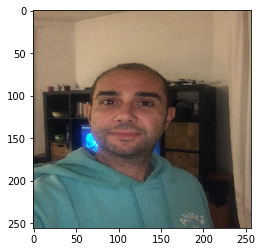

In [4]:
import matplotlib.pyplot as plt
for image in dataset.take(1):
    plt.imshow(image[0]/255.)

In [5]:
def rescale(data):
    data = data / 255.
    data = tf.image.convert_image_dtype(data, tf.float32)
    return data

In [6]:
dataset = dataset.map(rescale)

In [7]:
for image in dataset.take(1):
    print(image.shape)

(32, 256, 256, 3)


In [8]:
def discriminator():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(64, (5, 5), 2, padding="same", input_shape=(256, 256, 3)))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Conv2D(128, (5, 5), 2, padding="same"))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Conv2D(256, (5, 5), 2, padding="same"))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Conv2D(128, (5, 5), 2, padding="same"))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1))
    return model

In [9]:
def generator():
    model = keras.Sequential()
    model.add(keras.layers.Dense(32 * 32 * 256, use_bias=False, input_shape=(100,)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())
    
    model.add(keras.layers.Reshape((32, 32, 256)))
    model.add(keras.layers.Conv2DTranspose(256, (5, 5), 1, padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())
    
    model.add(keras.layers.Conv2DTranspose(128, (5, 5), 2, padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())
    
    model.add(keras.layers.Conv2DTranspose(64, (5, 5), 2, padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())
    
    model.add(keras.layers.Conv2DTranspose(3, (5, 5), 2, padding="same"))
    return model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


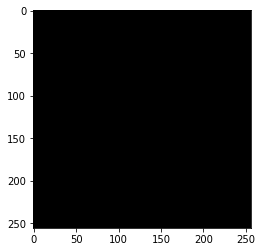

In [10]:
model_gen = generator()
data = tf.random.normal([1, 100])
data_gen = model_gen(data)
plt.imshow(data_gen[0])

In [11]:
loss_criterion = keras.losses.BinaryCrossentropy(from_logits=True)
model_dis = discriminator()

In [12]:
def generator_loss(fake_input):
    loss = loss_criterion(tf.ones_like(fake_input), fake_input)
    return loss

In [13]:
def discriminator_loss(real_output, fake_output):
    loss_real = loss_criterion(tf.ones_like(real_output), real_output)
    loss_fake = loss_criterion(tf.zeros_like(fake_output), fake_output)
    loss_total = loss_real + loss_fake
    return loss_total

In [14]:
optimizer_gen = keras.optimizers.Adam(0.02)
optimizer_dis = keras.optimizers.Adam(0.02)

In [15]:
@tf.function
def train_step(images):
    noise = tf.random.normal([32, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        fake_gen = model_gen(noise, training=True)
        
        fake_output = model_dis(fake_gen, training=True)
        real_output = model_dis(images, training=True)
        
        gen_loss = generator_loss(fake_output)
        dis_loss = discriminator_loss(real_output, fake_output)
    generator_grad = gen_tape.gradient(gen_loss, model_gen.trainable_variables)
    discriminator_grad = disc_tape.gradient(dis_loss, model_dis.trainable_variables)
    
    optimizer_gen.apply_gradients(zip(generator_grad, model_gen.trainable_variables))
    optimizer_dis.apply_gradients(zip(discriminator_grad, model_dis.trainable_variables))

In [16]:
seed = tf.random.normal([16, 100])
def generate_images(model, epoch):
    pred = model(seed, training=False)
    for i in range(pred.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(pred[i])
        plt.axis("off")
    plt.show()

In [17]:
import time
def train(epochs):
    for epoch in range(epochs):
        start = time.time()
        for images in dataset:
            train_step(images)
        print("Epoch:",epoch, "time:", time.time() - start)
        generate_images(model_gen, epoch)
    generate_images(model_gen, epoch)

Epoch: 0 time: 264.01657938957214


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

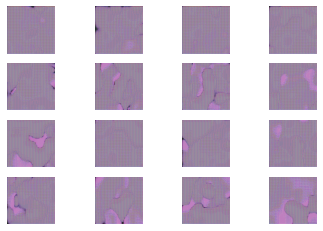

Epoch: 1 time: 287.8262071609497


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

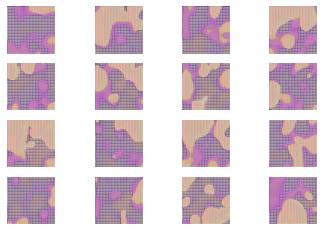

Epoch: 2 time: 232.65490913391113


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

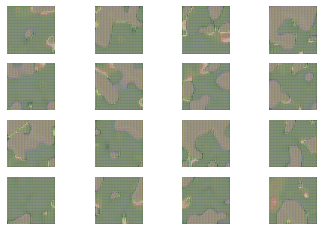

Epoch: 3 time: 213.74462962150574


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

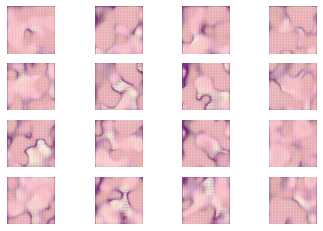

Epoch: 4 time: 214.8633451461792


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

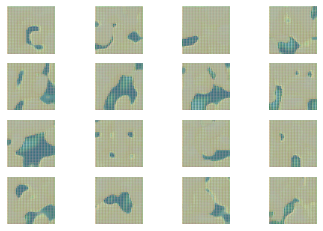

Epoch: 5 time: 203.0741047859192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

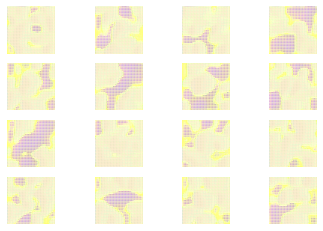

Epoch: 6 time: 199.70694255828857


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

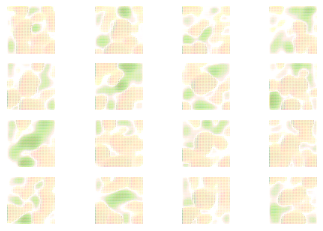

Epoch: 7 time: 201.52646946907043


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

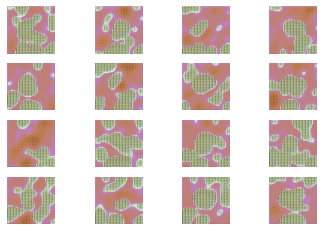

Epoch: 8 time: 198.71073579788208


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

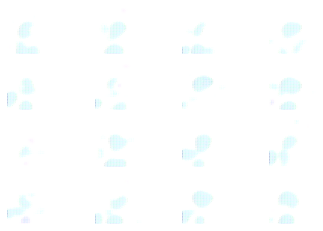

Epoch: 9 time: 198.8221254348755


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

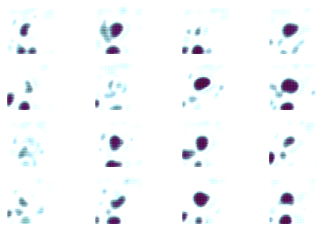

Epoch: 10 time: 200.8764877319336


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

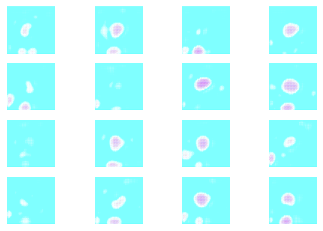

Epoch: 11 time: 200.0368766784668


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

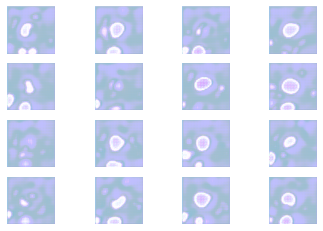

Epoch: 12 time: 200.61632919311523


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

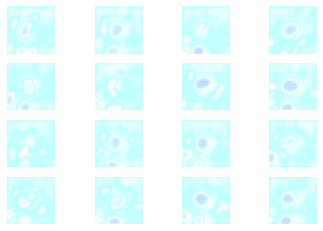

Epoch: 13 time: 198.80149483680725


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

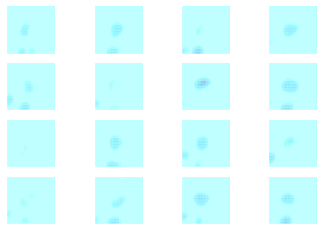

Epoch: 14 time: 198.8051733970642


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

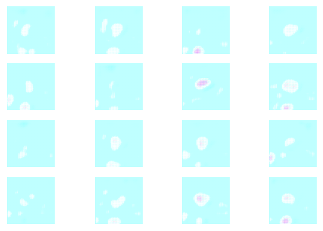

Epoch: 15 time: 200.608318567276


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

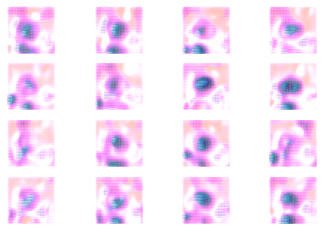

Epoch: 16 time: 205.09833884239197


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

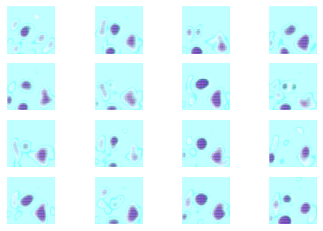

Epoch: 17 time: 198.17767906188965


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

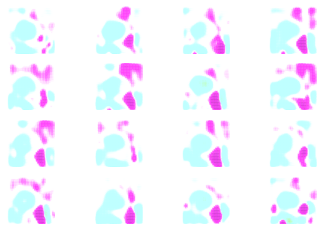

Epoch: 18 time: 199.9331157207489


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

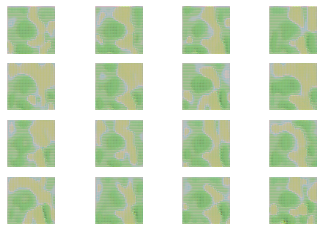

Epoch: 19 time: 209.1978850364685


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

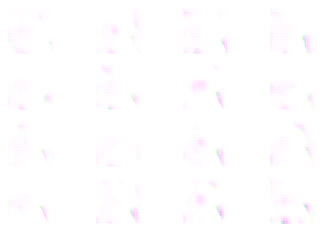

Epoch: 20 time: 198.83602666854858


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

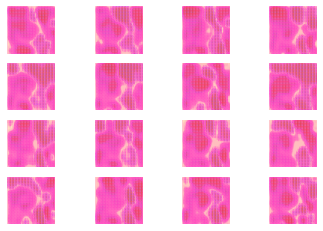

Epoch: 21 time: 199.77432203292847


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

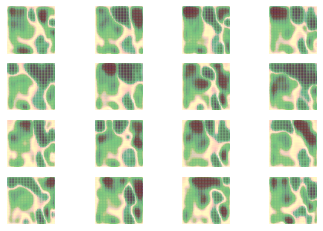

Epoch: 22 time: 200.4766993522644


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

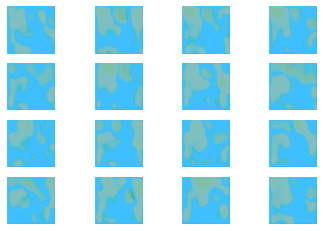

Epoch: 23 time: 199.6913206577301


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

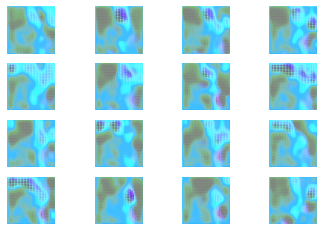

Epoch: 24 time: 199.9271388053894


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

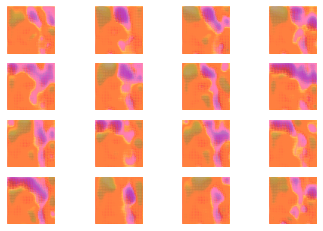

Epoch: 25 time: 199.6103539466858


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

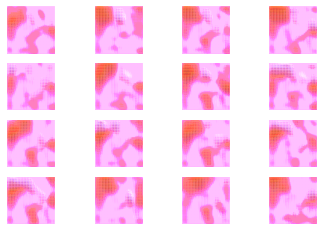

Epoch: 26 time: 256.08310866355896


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

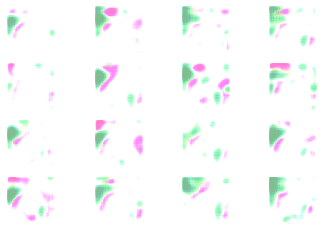

Epoch: 27 time: 283.1522870063782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

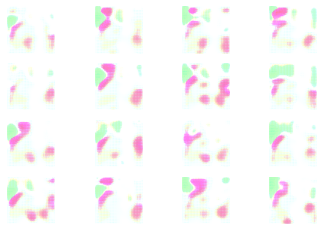

Epoch: 28 time: 245.22899293899536


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

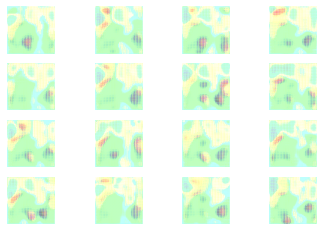

Epoch: 29 time: 244.0981137752533


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

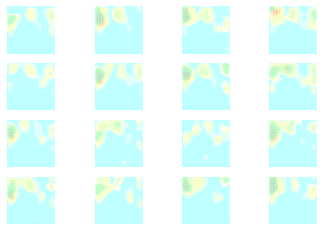

Epoch: 30 time: 209.2486650943756


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

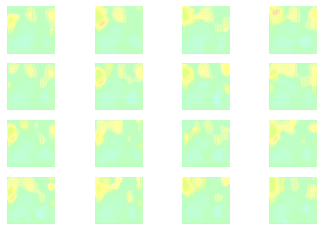

Epoch: 31 time: 201.01426362991333


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

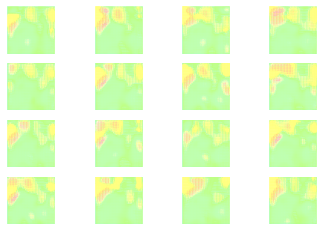

Epoch: 32 time: 201.20874190330505


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

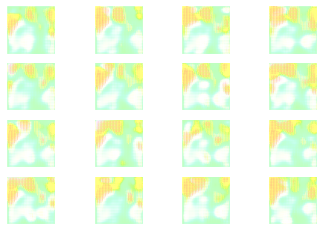

Epoch: 33 time: 199.0425374507904


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

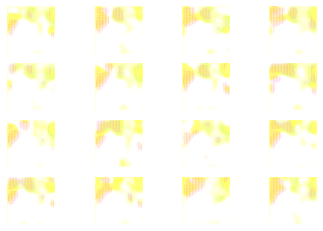

Epoch: 34 time: 201.28853011131287


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

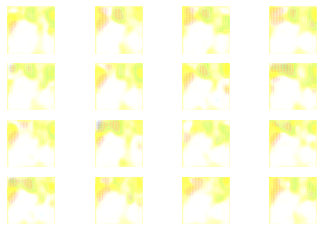

Epoch: 35 time: 199.79851698875427


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

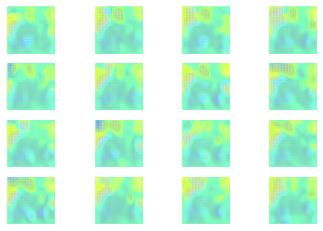

Epoch: 36 time: 200.88261246681213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

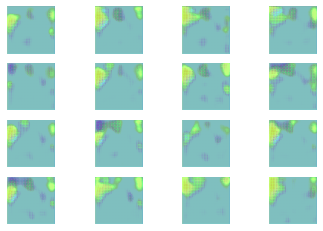

Epoch: 37 time: 199.69086718559265


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

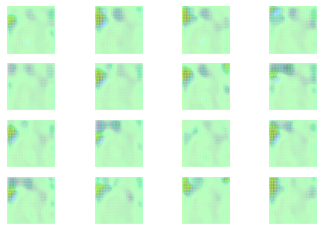

Epoch: 38 time: 199.55217576026917


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

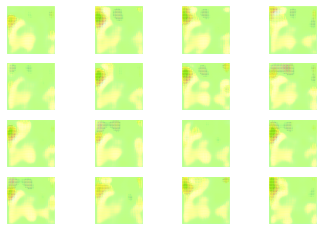

Epoch: 39 time: 198.82212734222412


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

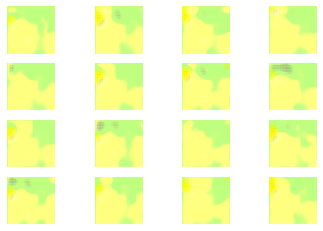

Epoch: 40 time: 200.07093572616577


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

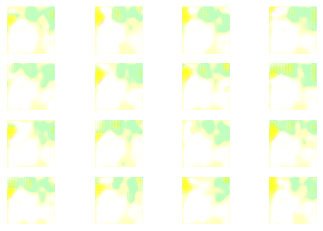

Epoch: 41 time: 198.57091450691223


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

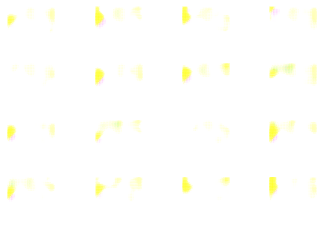

Epoch: 42 time: 198.91986680030823


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

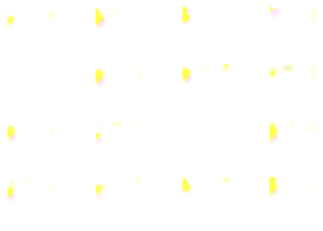

Epoch: 43 time: 198.88196873664856


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

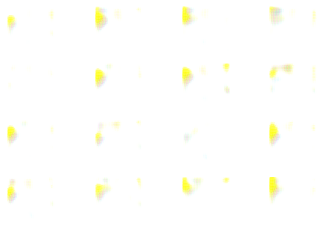

Epoch: 44 time: 200.58640813827515


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

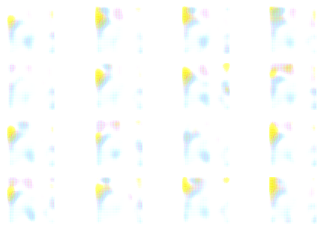

Epoch: 45 time: 199.42950439453125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

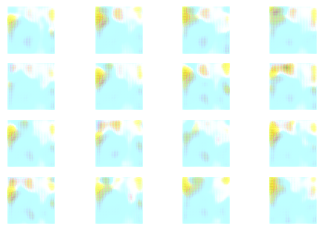

Epoch: 46 time: 199.5624237060547


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

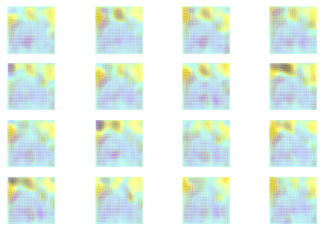

Epoch: 47 time: 199.75264072418213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

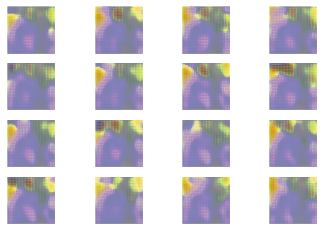

Epoch: 48 time: 198.80015397071838


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

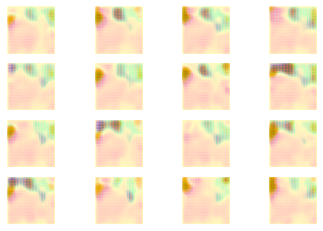

Epoch: 49 time: 197.891615152359


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

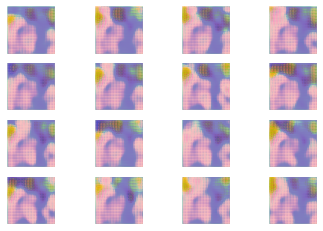

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

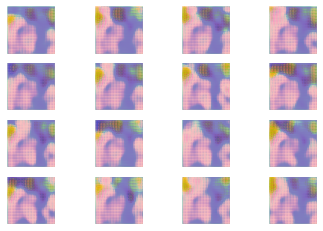

In [18]:
train(50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


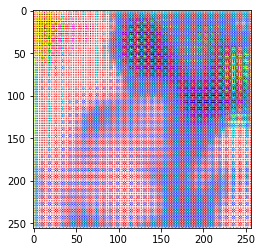

In [19]:
a = tf.random.normal([1, 100])
pred = model_gen(a, training=False)
plt.imshow(pred[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


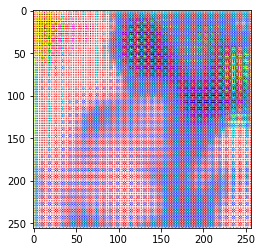

In [24]:
plt.imshow(pred[0])

# Project 6

In [58]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.utils as vutil
import matplotlib.pyplot as plt

In [59]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = dset.ImageFolder("D:\datasets_CSV\selfie", transform=transform)

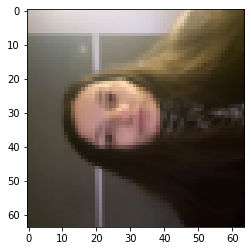

In [60]:
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True)
images, labels = next(iter(datasets))
plt.imshow(np.transpose(vutil.make_grid(images[0], padding=2, normalize=True),(1,2,0)))
plt.show()

In [77]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 800, 4, 1, 0, bias=False),
            nn.BatchNorm2d(800),
            nn.ReLU(),
            
            nn.ConvTranspose2d(800, 400, 4, 2, 1, bias=False),
            nn.BatchNorm2d(400),
            nn.ReLU(),
            
            nn.ConvTranspose2d(400, 200, 4, 2, 1, bias=False),
            nn.BatchNorm2d(200),
            nn.ReLU(),
            
            nn.ConvTranspose2d(200, 100, 4, 2, 1, bias=False),
            nn.BatchNorm2d(100),
            nn.ReLU(),
            
            nn.ConvTranspose2d(100, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    def forward(self, images):
        return self.main(images)

In [78]:
netG = Generator()
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 800, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(800, 400, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(400, 200, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(200, 100, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): ConvTranspose2d(100, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [79]:
# # Number of channels in the training images. For color images this is 3
# nc = 3

# # Size of z latent vector (i.e. size of generator input)
# nz = 100

# # Size of feature maps in generator
# ngf = 64

# # Size of feature maps in discriminator
# ndf = 64

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
#         self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(64 * 4, 64 * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, images):
        return self.main(images)

In [80]:
netD = Discriminator()
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [84]:
criterion = nn.BCELoss()

fixed_noise = torch.randn(32, 100, 1, 1)

In [85]:
import torch.optim as optim

optimizerD = optim.Adam(netD.parameters(), lr=0.02)
optimizerG = optim.Adam(netG.parameters(), lr=0.02)

In [89]:
real_label = 1.
fake_label = 0.
img_list = []
G_losses = []
D_losses = []
iters = 0
num_epochs = 50

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, (data, _) in enumerate(dataloader):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data.to("cpu")
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device="cpu")
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(32, 100, 1, 1, device="cpu")
#         print(noise.shape)
        # Generate fake image batch with G
        fake = netG(noise)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        label = torch.full((output.size(0),), fake_label, dtype=torch.float, device="cpu")
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        label = torch.full((output.size(0),), real_label, dtype=torch.float, device="cpu")
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutil.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/50][0/14]	Loss_D: 5.4371	Loss_G: 52.4457	D(x): 0.9687	D(G(z)): 0.2369 / 0.0040
[1/50][0/14]	Loss_D: 0.0000	Loss_G: 94.0914	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[2/50][0/14]	Loss_D: 0.0000	Loss_G: 99.1681	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[3/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[4/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[5/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[6/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[7/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[8/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[9/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[10/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[11/50][0/14]	Loss_D: 0.0000	Loss_G: 100.0000	D(x): 1.0000	D(G(

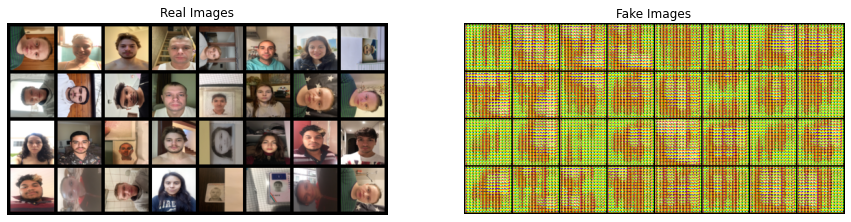

In [90]:
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutil.make_grid(real_batch[0].to("cpu")[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

# Project 7

In [2]:
import torch
import torch.nn as nn
from torch import optim
from torchvision import transforms, datasets

In [4]:
trans = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [5]:
data = datasets.ImageFolder("D:/datasets_CSV/crops/Agricultural-crops", trans)

In [7]:
dataset = torch.utils.data.DataLoader(data, batch_size=4, shuffle=True, num_workers=4)

In [11]:
vary = data.classes

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

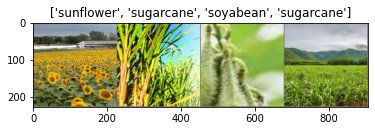

In [14]:
import torchvision
inputs, classes = next(iter(dataset))
grid = torchvision.utils.make_grid(inputs)
imshow(grid, title=[vary[x] for x in classes])

In [15]:
classes

tensor([25, 24, 23, 24])

In [60]:
import time
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_acc = 0
    dataset_size = len(data)
    for epochs in range(num_epochs):
        running_loss = 0
        running_corrects = 0
        model.train()
        for inputs, labels in dataset:
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        scheduler.step()
        epoch_loss = running_loss / dataset_size
        epoch_acc = running_corrects.double() / dataset_size
        print(f'Loss: {epoch_loss} Acc: {epoch_acc}')
        if epoch_acc>best_acc:
            best_acc = epoch_acc
    print()
    time_elapsed = time.time() - since
    print(time_elapsed // 60, ": ", time_elapsed % 60)
    print(best_acc)
    return model

In [61]:
import torch.nn.functional as f
from torch.optim import lr_scheduler
inputs.size()

torch.Size([4, 3, 224, 224])

In [62]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(56180, 50)
        self.fc2 = nn.Linear(50, len(vary))
    def forward(self, x):
        x = f.relu(f.max_pool2d(self.conv1(x), 2))
        x = f.relu(f.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.size(0), -1)
        x = f.relu(self.fc1(x))
        x = f.dropout(x, training=self.training)
        x = self.fc2(x)
        return f.softmax(x, dim=1)

In [63]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [64]:
model_ft = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=25)

Loss: 3.4013705984099496 Acc: 0.031363088057901084
Loss: 3.4009666370971643 Acc: 0.03498190591073583
Loss: 3.398842824526374 Acc: 0.04463208685162847
Loss: 3.3929767185873807 Acc: 0.05790108564535585
Loss: 3.3852393661678484 Acc: 0.05548854041013269
Loss: 3.3910640493952036 Acc: 0.05307599517490953
Loss: 3.386845226886045 Acc: 0.05669481302774427
Loss: 3.381872259664593 Acc: 0.06272617611580217
Loss: 3.3804586106243986 Acc: 0.06634499396863691
Loss: 3.3835952327967553 Acc: 0.06513872135102533
Loss: 3.3843388712736897 Acc: 0.06272617611580217
Loss: 3.3791474067977885 Acc: 0.06755126658624849
Loss: 3.3793676129583856 Acc: 0.0735826296743064
Loss: 3.37976459427248 Acc: 0.06634499396863691
Loss: 3.380074639372141 Acc: 0.06272617611580217
Loss: 3.383121857740911 Acc: 0.06634499396863691
Loss: 3.376938010585035 Acc: 0.07478890229191798
Loss: 3.384046018483124 Acc: 0.06513872135102533
Loss: 3.3821021061035634 Acc: 0.0735826296743064
Loss: 3.3797500498763613 Acc: 0.0735826296743064
Loss: 3.379